# Decision Tree Regression - Daily Data

### We are using Decision Tree Regression to Predict the Daily Minimum and Maximum Temperature

In [15]:
import pandas as pd
import numpy as np
from sklearn import tree 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
import matplotlib.pyplot as plt
from datetime import datetime, date, time

#### Now we are going to import our data and convert it required form

In [16]:
#data Import
location = "kolkata"

filename_t2 = "WD_{0}_{1}.csv"
filed = filename_t2.format(location, "D")

def apply_dt(string):
    return datetime.strptime(string, '%Y-%m-%d')

df = pd.read_csv(filed, parse_dates=['date'], index_col='date', date_parser=apply_dt)

def apply_tm(string):
    return datetime.strptime(string, '%H:%M:%S').time()

df['sunrise'] = df['sunrise'].apply(apply_tm)
df['sunset'] = df['sunset'].apply(apply_tm)
df['moonrise'] = df['moonrise'].apply(apply_tm)
df['moonset'] = df['moonset'].apply(apply_tm)

del(df['Unnamed: 0'])

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1871 entries, 2014-01-01 to 2019-06-30
Data columns (total 8 columns):
maxtempC             1871 non-null int64
mintempC             1871 non-null int64
sunrise              1871 non-null object
sunset               1871 non-null object
moonrise             1871 non-null object
moonset              1871 non-null object
moon_phase           1871 non-null object
moon_illumination    1871 non-null int64
dtypes: int64(3), object(5)
memory usage: 131.6+ KB


#### Now we are going to split our dataset as follows
##### x -> features 
##### y -> target

In [17]:
#y = f(x) ; y,x separator
x = df.index

reqtemp = ['maxtempC','mintempC']
reqsun = ['sunrise','sunset']
reqmoon = ['moonrise','moonset','moon_illumination']

req = reqtemp# + reqsun + reqmoon

y = df[req]

### Now we are going to apply the machine learning to train and predict the data

In [21]:
#data split, data model implementation
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)


clf = tree.DecisionTreeRegressor()


clf = clf.fit(x_train[:, np.newaxis],y_train)


y_pred = clf.predict(x_test[:, np.newaxis])

y_pred = pd.DataFrame(y_pred, index = x_test, columns = req)

for i in req:
    print("Accuracy "+i+" : ",metrics.r2_score(y_test[i], y_pred[i]))

Accuracy maxtempC :  0.9953389605297245
Accuracy mintempC :  0.9964205362389862


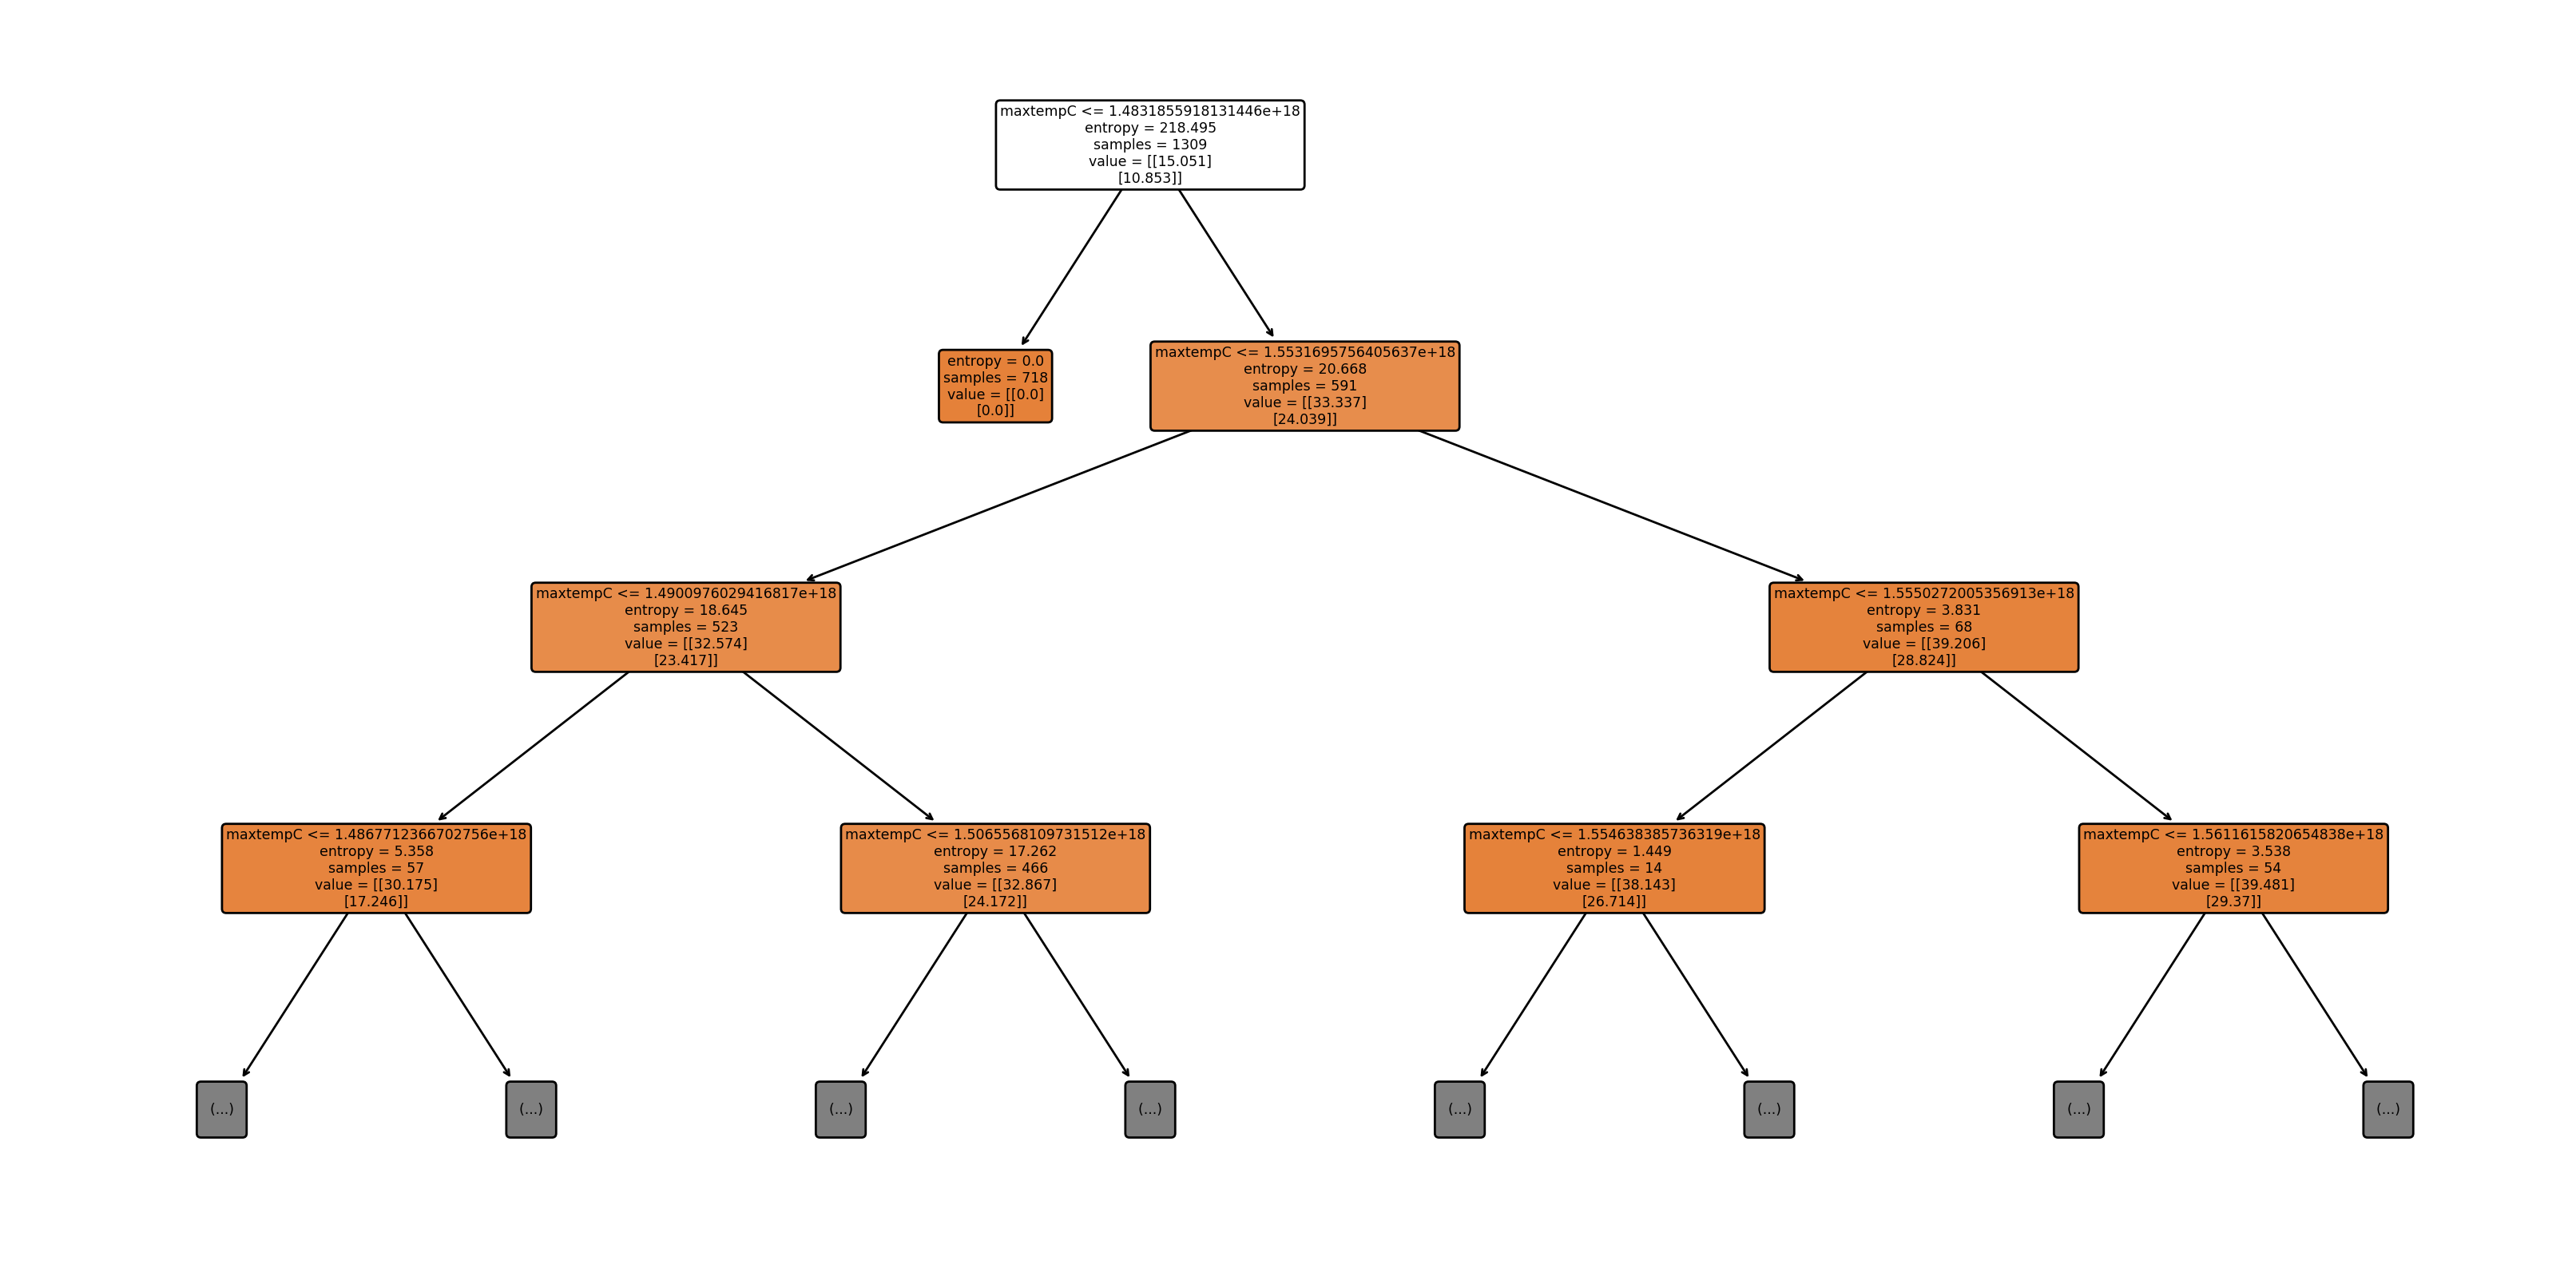

In [22]:
plt.figure(figsize = (20,10), dpi = 200)
plt.savefig.transparent = False
plt.savefig.format = 'png'

tree.plot_tree(clf, max_depth = 3, feature_names = req, label='all', 
               filled = True, rounded = True)
plt.savefig('{}_D_Tree_R.png'.format(location))

In [23]:
print("Done")

Done
